In [1]:
from datasets import ImageDataSet, CroppedOutImageDataSet
from skimage import io
import os
from os.path import join
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
import torch

# Creating a simple Dataloader from our dataset and displaying the results

In [2]:
root_dir = 'data'
ImageDataset = ImageDataSet(root_dir)

In [3]:
dataloader = DataLoader(ImageDataset, batch_size=1, shuffle=True)

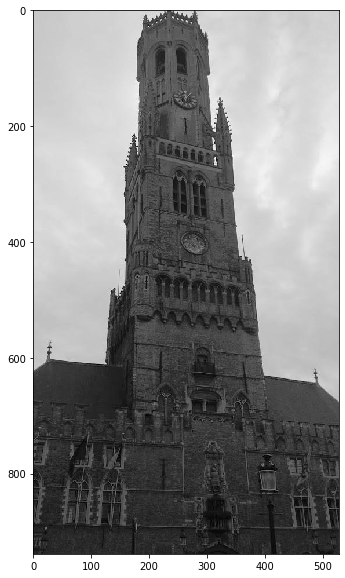

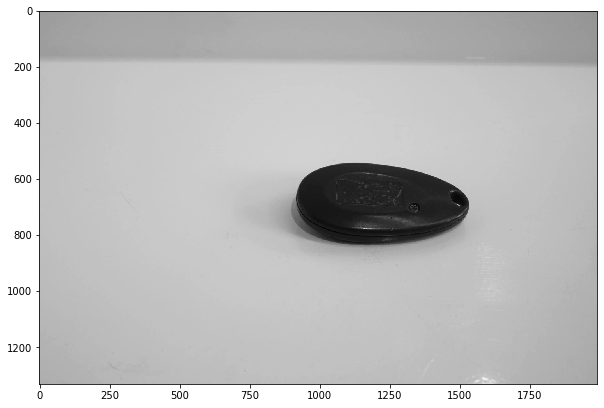

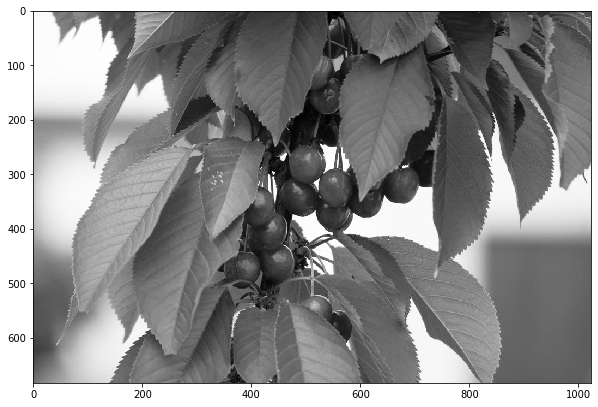

In [4]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 4:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 7:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 42:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
        break

# Testing the Dataset, which delievers cropped out images

In [5]:
Croppeddataloader = DataLoader(CroppedOutImageDataSet(ImageDataset), batch_size=1, shuffle=True)

In [6]:
# Function to visualize the contents of a batch
def visualize_batch(batch):
    fig, axs = plt.subplots(1,5,figsize=(30,5))
    data = np.moveaxis(batch[0].numpy(), 0, -1)
    fig.suptitle(f'Data-ID:{sample_batched[2].numpy()}')
    axs[0].imshow(np.squeeze(data)[0,...], cmap= 'Greys_r')
    axs[0].set_title('cropped image')
    axs[1].imshow(np.squeeze(data)[1,...], cmap= 'Greys_r')
    axs[1].set_title('cropped area')
    axs[2].imshow(np.squeeze(data)[2,...])
    axs[2].set_title('x-coordinate')
    axs[3].imshow(np.squeeze(data)[3,...])
    axs[3].set_title('y-coordinate')
    axs[4].imshow(np.squeeze(batch[1]),cmap= 'Greys_r')
    axs[4].set_title('target')
    plt.show()

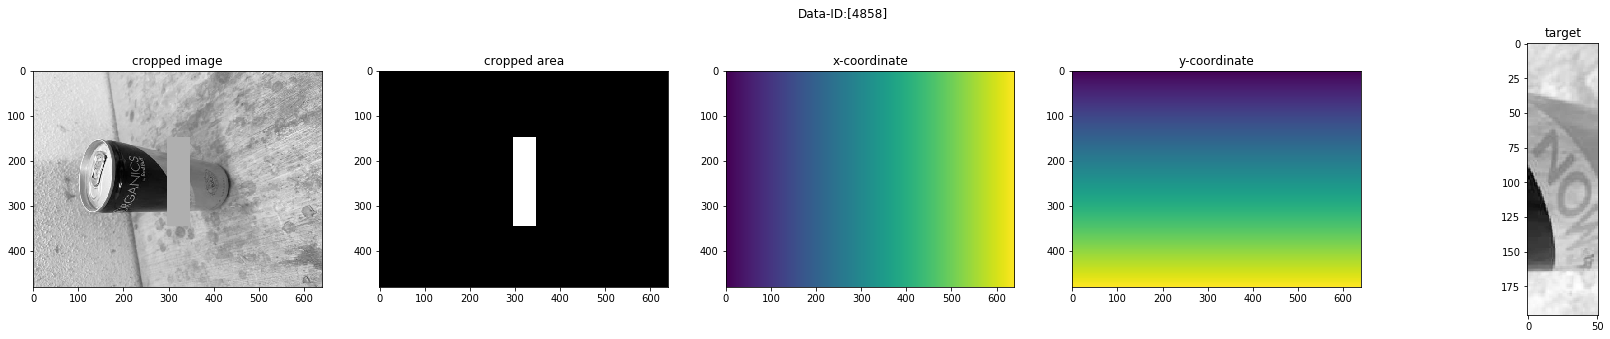

In [7]:
for i_batch, sample_batched in enumerate(Croppeddataloader):
    if i_batch == 4:
        visualize_batch(sample_batched)
        break

In [8]:
target_device = 'cuda'

n = 0
for data in Croppeddataloader:
        inputs, targets, ids = data
        inputs = inputs.to(target_device)
        targets = targets.to(target_device)
        n+=1
        if(n%100 == 0):
            print(n)

KeyboardInterrupt: 